# &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;                     Clustering

In [1]:
"""
Cluster Analysis → Identifying Groups Based on Perceptions & Impact
    • Why?
        • Can we segment people based on their perceptions of shutdowns, mental health impact, 
            and future protest intentions?
    • Method:
        • K-Means Clustering or Hierarchical Clustering
        • Identify clusters of people who have similar attitudes and behaviors toward shutdowns.
"""

'\nCluster Analysis → Identifying Groups Based on Perceptions & Impact\n    • Why?\n        • Can we segment people based on their perceptions of shutdowns, mental health impact, \n            and future protest intentions?\n    • Method:\n        • K-Means Clustering or Hierarchical Clustering\n        • Identify clusters of people who have similar attitudes and behaviors toward shutdowns.\n'

### <p align="center">📌 Step 6.1: Hybrid Feature Selection Approach for K-means Clustering</p>

In [2]:
"""
            We will use a hybrid approach that combines "PCA", "ANOVA Test" & Mutual 
            Information Score to identify the most relevant features for clustering.
            --------------------------------------------------------------------------

🔹 Steps for Feature Selection
-------------------------------
    ✅ Step 1: Loads the entire dataset and encodes all categorical variables.
    ✅ Step 2: Apply PCA
        • Identify which features contribute the most variance.
        • Select features based on explained variance and PCA component loadings.
    ✅ Step 3: Perform ANOVA Test
        • Test which features significantly differentiate clusters.
        • Keep only features where p-value < 0.05 (statistically significant).
    ✅ Step 4: Compute Mutual Information (MI) Scores
        • Measures how much information each feature contributes to clustering.
        • Select high MI-score features.
    ✅ Step 5: Combine All Methods
        • Features selected by all three methods are finalized.
"""

'\n            We will use a hybrid approach that combines "PCA", "ANOVA Test" & Mutual \n            Information Score to identify the most relevant features for clustering.\n            --------------------------------------------------------------------------\n\n🔹 Steps for Feature Selection\n-------------------------------\n    ✅ Step 1: Loads the entire dataset and encodes all categorical variables.\n    ✅ Step 2: Apply PCA\n        • Identify which features contribute the most variance.\n        • Select features based on explained variance and PCA component loadings.\n    ✅ Step 3: Perform ANOVA Test\n        • Test which features significantly differentiate clusters.\n        • Keep only features where p-value < 0.05 (statistically significant).\n    ✅ Step 4: Compute Mutual Information (MI) Scores\n        • Measures how much information each feature contributes to clustering.\n        • Select high MI-score features.\n    ✅ Step 5: Combine All Methods\n        • Features sele

##### ✅ Step 6.1.1: Loads the entire dataset and encodes all categorical variables.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans

In [4]:
# Load the entire dataset
file_path = "df_cleaned.xlsx"
xls = pd.ExcelFile(file_path)
df = pd.read_excel(xls, sheet_name='Sheet1')

# Encode all categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Standardize the dataset
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

##### ✅ Step 6.1.2: Applies PCA to find features that contribute most variance.

In [5]:
# Apply PCA to Identify High-Variance Features
pca = PCA(n_components=len(df_scaled.columns))
pca.fit(df_scaled)

# PCA Loadings (Contribution of each feature to principal components)
pca_loadings = pd.DataFrame(pca.components_.T, index=df_scaled.columns, columns=[f'PC{i+1}' for i in range(len(df_scaled.columns))])

# Calculate the variance contribution of each feature
variance_contribution = pca_loadings.abs().sum(axis=1)

# Sort the features based on their variance contribution
sorted_variance_contribution = variance_contribution.sort_values(ascending=False)

# Display the variance contribution for each feature
print("Variance contribution for each feature:")
print("----------------------------------------")
i=1
for feature, contribution in sorted_variance_contribution.items():
    print(f"{i}: {feature}: {contribution}")
    i+=1
print("----------------------------------------")
   
# Select features contributing most to the top principal components
selected_features_pca = sorted_variance_contribution.head(12).index.tolist()

# Print the top selected features
print("\nFeatures selected based on PCA variance contribution:")
print("--------------------------------------------------------")
i=1
for feature in selected_features_pca:
    print(f"\t{i}: {feature}")
    i+=1


Variance contribution for each feature:
----------------------------------------
1: Shutdown_Effectiveness_in_GIP: 4.5117488518260105
2: Justify_Shutdown_in_Certain_Situation: 4.455151195107256
3: Gender: 4.376943972036367
4: Protest_Hindrance_AG: 4.366088359066935
5: Switch_Alt_Comm_Methods_DS: 4.268337468738797
6: Social_Media_Usage_Change_AS: 4.267998187415441
7: Primary_Communication_Mode_BS: 4.217225351908116
8: News_Reliance_on_Internet_BS: 4.1998741795093215
9: Internet_Usage_BS: 4.183250332676544
10: Internet_Reliance_BS: 4.176588221611217
11: S_Limit_Freedom_of_Speech: 4.163659186580865
12: Lasting_Impact_on_MH: 4.151116462452892
13: Mental_Impact_of_S: 4.139780741831614
14: IS_Affect_Daily_Routine: 4.103673205144663
15: Hometown: 4.090068177895923
16: Change_Digital_Dependency: 4.079026263656861
17: Reconsider_Offline_Alternatives: 4.056883511652156
18: ISR_in_GPC_in_Bang: 4.016909535026796
19: Age_Range: 4.01472791669018
20: Democracy_Perception_if_SDOA: 4.014586521281955
21

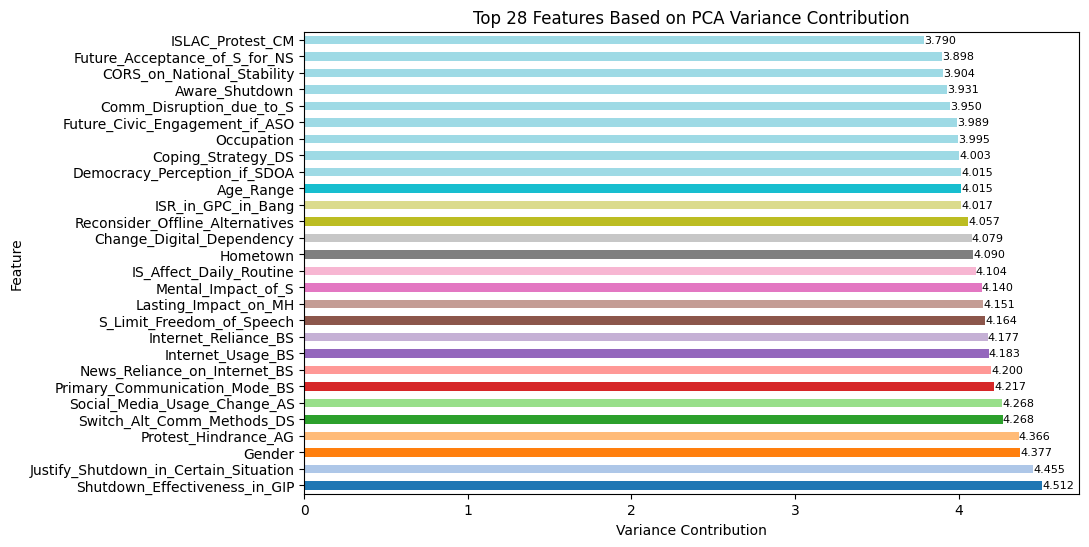

In [6]:
import matplotlib.pyplot as plt

# Plot variance contribution of the top 28 features
top_features = sorted_variance_contribution.head(28)

# Create a horizontal bar plot with different colors
plt.figure(figsize=(10, 6))
bars = top_features.plot(kind='barh', color=plt.cm.tab20(range(len(top_features))))

# Adding value labels on each bar
for i, (value, feature) in enumerate(zip(top_features, top_features.index)):
    plt.text(value, i, f'{value:.3f}', va='center', ha='left', fontsize=8)

# Labeling the axes and setting title
plt.xlabel('Variance Contribution')
plt.ylabel('Feature')
plt.title('Top 28 Features Based on PCA Variance Contribution')

# Display the plot
plt.show()


##### ✅ Step 6.1.3: Performs ANOVA(Analysis of Variance) to identify features that significantly differentiate clusters.

In [7]:
# Perform ANOVA Test to Identify Statistically Significant Features
# Run K-Means with an arbitrary K (e.g., 3) to get cluster labels for ANOVA test
kmeans = KMeans(n_clusters=7, random_state=42, n_init=10, max_iter=300)
df_scaled['Cluster'] = kmeans.fit_predict(df_scaled)

anova_f_values, anova_p_values = f_classif(df_scaled.drop(columns=['Cluster']), df_scaled['Cluster'])
anova_results = pd.DataFrame({'Feature': df_scaled.columns[:-1], 'F-Value': anova_f_values, 'P-Value': anova_p_values})
selected_features_anova = anova_results[anova_results['P-Value'] < 0.005]['Feature'].tolist()

print("Features selected based on ANOVA test (p < 0.005):")
for i in selected_features_anova:
    print("\t",i)

Features selected based on ANOVA test (p < 0.005):
	 Age_Range
	 Gender
	 Occupation
	 Aware_Shutdown
	 Internet_Usage_BS
	 Internet_Reliance_BS
	 IS_Affect_Daily_Routine
	 Change_Digital_Dependency
	 Reconsider_Offline_Alternatives
	 Justify_Shutdown_in_Certain_Situation
	 S_Limit_Freedom_of_Speech
	 Shutdown_Effectiveness_in_GIP
	 Future_Acceptance_of_S_for_NS
	 Protest_Hindrance_AG
	 Future_Civic_Engagement_if_ASO
	 ISLAC_Protest_CM
	 Primary_Communication_Mode_BS
	 Comm_Disruption_due_to_S
	 Social_Media_Usage_Change_AS
	 Switch_Alt_Comm_Methods_DS
	 News_Reliance_on_Internet_BS
	 Mental_Impact_of_S
	 Coping_Strategy_DS
	 Lasting_Impact_on_MH
	 CORS_on_National_Stability
	 Democracy_Perception_if_SDOA
	 ISR_in_GPC_in_Bang


In [8]:
anova_results

,Feature,F-Value,P-Value
0,Age_Range,13.736606,3.637919e-15
1,Gender,15.547906,2.837137e-17
2,Occupation,2321.835372,0.000000e+00
3,Hometown,2.244168,3.690196e-02
4,Aware_Shutdown,1510.521737,0.000000e+00
5,Internet_Usage_BS,26.766178,3.924783e-30
6,Internet_Reliance_BS,25.137661,2.718899e-28
7,IS_Affect_Daily_Routine,63.580922,4.686422e-69
8,Change_Digital_Dependency,37.163866,1.200563e-41
9,Reconsider_Offline_Alternatives,42.695778,1.328879e-47


##### ✅ Step 6.1.4: Computes Mutual Information Scores to measure how much each feature contributes to clustering.

In [9]:
# Compute Mutual Information Scores
mi_scores = mutual_info_classif(df_scaled.drop(columns=['Cluster']), df_scaled['Cluster'])
mi_results = pd.DataFrame({'Feature': df_scaled.columns[:-1], 'MI Score': mi_scores})
mi_results_sorted = mi_results.sort_values(by='MI Score', ascending=False)
mi_results_sorted


,Feature,MI Score
4,Aware_Shutdown,0.313862
2,Occupation,0.259817
10,Justify_Shutdown_in_Certain_Situation,0.249243
6,Internet_Reliance_BS,0.185320
11,S_Limit_Freedom_of_Speech,0.184802
26,Democracy_Perception_if_SDOA,0.139679
5,Internet_Usage_BS,0.137574
8,Change_Digital_Dependency,0.135038
17,Primary_Communication_Mode_BS,0.133336
16,ISLAC_Protest_CM,0.129010


In [10]:
selected_features_mi = mi_results.sort_values(by='MI Score', ascending=False).head(12)['Feature'].tolist()
print("Features selected based on Mutual Information:")
for i in selected_features_mi:
    print("\t",i)

Features selected based on Mutual Information:
	 Aware_Shutdown
	 Occupation
	 Justify_Shutdown_in_Certain_Situation
	 Internet_Reliance_BS
	 S_Limit_Freedom_of_Speech
	 Democracy_Perception_if_SDOA
	 Internet_Usage_BS
	 Change_Digital_Dependency
	 Primary_Communication_Mode_BS
	 ISLAC_Protest_CM
	 Future_Acceptance_of_S_for_NS
	 News_Reliance_on_Internet_BS


##### ✅ Step 6.1.5: Selects the final features by combining PCA, ANOVA, and MI Scores.

In [11]:
# Combine All Methods to Finalize Feature Selection
final_selected_features = list(set(selected_features_pca) & 
                               set(selected_features_anova) & set(selected_features_mi))
print("Final selected features using Hybrid Approach:")
print("-----------------------------------------------")
i=1
for feature in final_selected_features:
    print(f"\t{i}: {feature}")
    i+=1

Final selected features using Hybrid Approach:
-----------------------------------------------
	1: Internet_Usage_BS
	2: Internet_Reliance_BS
	3: Justify_Shutdown_in_Certain_Situation
	4: S_Limit_Freedom_of_Speech
	5: News_Reliance_on_Internet_BS
	6: Primary_Communication_Mode_BS


In [12]:
"""
                    Domain knowledge correction on selected features:
                    -------------------------------------------------
We will add more relevant features: 
        Shutdown_Effectiveness_in_GIP
        Future_Acceptance_of_S_for_NS
        Mental_Impact_of_S
        Lasting_Impact_on_MH
        Coping_Strategy_DS
        Future_Civic_Engagement_if_ASO
        Democracy_Perception_if_SDOA
        Change_Digital_Dependency
"""

'\n                    Domain knowledge correction on selected features:\n                    -------------------------------------------------\nWe will add more relevant features: \n        Shutdown_Effectiveness_in_GIP\n        Future_Acceptance_of_S_for_NS\n        Mental_Impact_of_S\n        Lasting_Impact_on_MH\n        Coping_Strategy_DS\n        Future_Civic_Engagement_if_ASO\n        Democracy_Perception_if_SDOA\n        Change_Digital_Dependency\n'

### <p align="center">📌 Step 6.2: Apply Clustering</p>

##### ✅ Step 6.2.1: Data Preprocessing & Feature Selection

In [13]:
"""
🔹 What will we do?
        • Select only the 12 relevant features from your dataset.
        • Handle missing values (if any).
        • Standardize numerical values to ensure K-Means performs well.
🔹 Why?
        • K-Means performs best when features are on a similar scale.
        • Standardization prevents features with large numerical ranges from dominating clustering.
🔹 How will we do it?
        ✅ Select the 15 features
        ✅ Check for missing values
        ✅ Apply Standardization (Z-score normalization using StandardScaler)
"""

'\n🔹 What will we do?\n        • Select only the 12 relevant features from your dataset.\n        • Handle missing values (if any).\n        • Standardize numerical values to ensure K-Means performs well.\n🔹 Why?\n        • K-Means performs best when features are on a similar scale.\n        • Standardization prevents features with large numerical ranges from dominating clustering.\n🔹 How will we do it?\n        ✅ Select the 15 features\n        ✅ Check for missing values\n        ✅ Apply Standardization (Z-score normalization using StandardScaler)\n'

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from mpl_toolkits.mplot3d import Axes3D

In [15]:
file_path = "df_cleaned.xlsx"
xls = pd.ExcelFile(file_path)
df = pd.read_excel(xls, sheet_name='Sheet1')

In [16]:
# Display the first few rows of preprocessed data
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.expand_frame_repr', False)  # Prevent wrapping to new lines
print("Raw Dataset")
print("------------")
print(df.head())

Raw Dataset
------------
  Age_Range  Gender Occupation    Hometown Aware_Shutdown Internet_Usage_BS Internet_Reliance_BS IS_Affect_Daily_Routine Change_Digital_Dependency Reconsider_Offline_Alternatives Justify_Shutdown_in_Certain_Situation S_Limit_Freedom_of_Speech Shutdown_Effectiveness_in_GIP Future_Acceptance_of_S_for_NS Protest_Hindrance_AG Future_Civic_Engagement_if_ASO     ISLAC_Protest_CM Primary_Communication_Mode_BS Comm_Disruption_due_to_S Social_Media_Usage_Change_AS Switch_Alt_Comm_Methods_DS News_Reliance_on_Internet_BS Mental_Impact_of_S                               Coping_Strategy_DS     Lasting_Impact_on_MH        CORS_on_National_Stability          Democracy_Perception_if_SDOA ISR_in_GPC_in_Bang
0     18-29  Female    Student  Chattogram            Yes         2-4 hours             A little                      No                 No change                              No                               Neutral                Not at all                       Neutral   

In [17]:
df.shape

(1267, 28)

In [18]:
# Selecting 15 categorical features for clustering
selected_features = [
    "Shutdown_Effectiveness_in_GIP", "Justify_Shutdown_in_Certain_Situation", "Future_Acceptance_of_S_for_NS",
    "Mental_Impact_of_S", "Lasting_Impact_on_MH", "Coping_Strategy_DS",
    "Protest_Hindrance_AG", "Future_Civic_Engagement_if_ASO", "Democracy_Perception_if_SDOA",
    "CORS_on_National_Stability", "Change_Digital_Dependency", "News_Reliance_on_Internet_BS",
    "Comm_Disruption_due_to_S","S_Limit_Freedom_of_Speech","Internet_Usage_BS"
]

df_selected = df[selected_features].copy()

In [19]:
print("Selected 15 relevant features")
print(df_selected.head())

Selected 15 relevant features
  Shutdown_Effectiveness_in_GIP Justify_Shutdown_in_Certain_Situation Future_Acceptance_of_S_for_NS Mental_Impact_of_S     Lasting_Impact_on_MH                               Coping_Strategy_DS Protest_Hindrance_AG Future_Civic_Engagement_if_ASO          Democracy_Perception_if_SDOA        CORS_on_National_Stability Change_Digital_Dependency News_Reliance_on_Internet_BS Comm_Disruption_due_to_S S_Limit_Freedom_of_Speech Internet_Usage_BS
0                       Neutral                               Neutral                       Neutral          No change        No lasting impact                                None of the above           Not at all                       Not sure                              Not sure                          Not sure                 No change           Not reliant at all            No disruption                Not at all         2-4 hours
1            Somewhat effective                                 Agree                   

In [20]:
df_selected.shape

(1267, 15)

In [21]:
label_encoder = LabelEncoder()
encoding_dict = {}

# Loop through each column in the DataFrame
for col in df.columns:
    # Fit and transform the column independently
    df[col] = label_encoder.fit_transform(df[col])
    
    # Store the mapping of original values to encoded values
    encoding_dict[col] = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))

# Print the original values and their corresponding encoded values for each column
for col, encoding in encoding_dict.items():
    print(f"Encoding for column '{col}':")
    for original_value, encoded_value in encoding.items():
        print(f"  {original_value} -> {encoded_value}")

Encoding for column 'Age_Range':
  18-29 -> 0
  30-39 -> 1
  40-54 -> 2
  <18 -> 3
Encoding for column 'Gender':
  Female -> 0
  Male -> 1
Encoding for column 'Occupation':
  Business Owner -> 0
  Emigrant -> 1
  Employee -> 2
  Homemaker -> 3
  Others -> 4
  Student -> 5
Encoding for column 'Hometown':
  Barishal -> 0
  Chattogram -> 1
  Dhaka -> 2
  Khulna -> 3
  Mymensingh -> 4
  Rajshahi -> 5
  Rangpur -> 6
  Sylhet -> 7
Encoding for column 'Aware_Shutdown':
  No -> 0
  Yes -> 1
Encoding for column 'Internet_Usage_BS':
  2-4 hours -> 0
  4-6 hours -> 1
  <2 hours -> 2
  >6 hours -> 3
Encoding for column 'Internet_Reliance_BS':
  A little -> 0
  Extremely -> 1
  Moderately -> 2
  Not at all -> 3
Encoding for column 'IS_Affect_Daily_Routine':
  No -> 0
  Somewhat -> 1
  Yes -> 2
Encoding for column 'Change_Digital_Dependency':
  Decreased significantly -> 0
  Decreased somewhat -> 1
  Increased significantly -> 2
  Increased somewhat -> 3
  No change -> 4
Encoding for column 'Reconsi

In [22]:
df_selected = df[selected_features].copy()

# Encoding categorical features using Label Encoding
label_encoders = {}
encoding_dict = {}
for column in selected_features:
    le = LabelEncoder()
    df_selected[column] = le.fit_transform(df_selected[column])
    label_encoders[column] = le
    
    # Store the mapping of original values to encoded values
    encoding_dict[column] = dict(zip(le.classes_, range(len(le.classes_))))


In [23]:
df_selected.shape

(1267, 15)

In [24]:
print(df_selected.head())

   Shutdown_Effectiveness_in_GIP  Justify_Shutdown_in_Certain_Situation  Future_Acceptance_of_S_for_NS  Mental_Impact_of_S  Lasting_Impact_on_MH  Coping_Strategy_DS  Protest_Hindrance_AG  Future_Civic_Engagement_if_ASO  Democracy_Perception_if_SDOA  CORS_on_National_Stability  Change_Digital_Dependency  News_Reliance_on_Internet_BS  Comm_Disruption_due_to_S  S_Limit_Freedom_of_Speech  Internet_Usage_BS
0                              1                                      2                              2                   0                     1                   3                     3                               2                             4                           3                          4                             0                         0                          3                  0
1                              2                                      0                              3                   0                     1                   2                     1  

In [25]:
# Standardizing the encoded categorical features
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_selected), columns=selected_features)

In [26]:
# Display the first few rows of preprocessed data
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.expand_frame_repr', False)  # Prevent wrapping to new lines
print("Preprocessed Data Sample:")
print(df_scaled.head())

Preprocessed Data Sample:
   Shutdown_Effectiveness_in_GIP  Justify_Shutdown_in_Certain_Situation  Future_Acceptance_of_S_for_NS  Mental_Impact_of_S  Lasting_Impact_on_MH  Coping_Strategy_DS  Protest_Hindrance_AG  Future_Civic_Engagement_if_ASO  Democracy_Perception_if_SDOA  CORS_on_National_Stability  Change_Digital_Dependency  News_Reliance_on_Internet_BS  Comm_Disruption_due_to_S  S_Limit_Freedom_of_Speech  Internet_Usage_BS
0                      -0.615408                               0.243364                      -0.005726           -1.425024              0.411903            0.961073              1.760341                       -0.129522                      1.948712                    1.265247                   0.976904                     -2.106259                 -2.384567                   1.901554          -1.394069
1                       0.196802                              -1.164590                       0.653790           -1.425024              0.411903            0.0127

In [27]:
print(df_scaled.describe().T)

                                        count          mean       std       min       25%       50%       75%       max
Shutdown_Effectiveness_in_GIP          1267.0 -7.991503e-17  1.000395 -1.427618 -0.615408  0.196802  1.009013  1.821223
Justify_Shutdown_in_Certain_Situation  1267.0 -6.729687e-17  1.000395 -1.164590 -1.164590 -0.460613  0.947340  1.651317
Future_Acceptance_of_S_for_NS          1267.0 -8.412108e-18  1.000395 -1.324757 -1.324757 -0.005726  0.653790  1.313306
Mental_Impact_of_S                     1267.0  1.261816e-16  1.000395 -1.425024 -1.425024 -0.164196  1.096632  1.096632
Lasting_Impact_on_MH                   1267.0  1.962825e-17  1.000395 -0.954279 -0.954279  0.411903  0.411903  1.778086
Coping_Strategy_DS                     1267.0 -8.131705e-17  1.000395 -1.883973 -0.935624  0.012724  0.012724  1.909422
Protest_Hindrance_AG                   1267.0 -8.412108e-18  1.000395 -1.249580 -1.249580 -0.246273  0.757034  1.760341
Future_Civic_Engagement_if_ASO         1

##### ✅ Step 6.2.2: Determine the Optimal Number of Clusters (K)

In [28]:
"""
🔹 What will we do?
    • Identify the best K (number of clusters) using three methods:
        1. Elbow Method (Primary)
        2. Silhouette Score (Cluster Separation)
        3. Davies-Bouldin Index (Cluster Quality)
🔹 Why?
    • K-Means requires a predefined K, so finding the best value ensures well-formed clusters.
    • The Elbow Method helps determine where adding more clusters stops improving compactness.
    • Silhouette Score ensures clusters are distinct and well-separated.
🔹 How will we do it?
    ✅ Run K-Means for multiple values of K (e.g., K=2 to K=10)
    ✅ Plot Elbow Curve (WCSS vs. K) to find the "elbow"
    ✅ Compute Silhouette Scores for each K
    ✅ Validate with the Davies-Bouldin Index
"""

'\n🔹 What will we do?\n    • Identify the best K (number of clusters) using three methods:\n        1. Elbow Method (Primary)\n        2. Silhouette Score (Cluster Separation)\n        3. Davies-Bouldin Index (Cluster Quality)\n🔹 Why?\n    • K-Means requires a predefined K, so finding the best value ensures well-formed clusters.\n    • The Elbow Method helps determine where adding more clusters stops improving compactness.\n    • Silhouette Score ensures clusters are distinct and well-separated.\n🔹 How will we do it?\n    ✅ Run K-Means for multiple values of K (e.g., K=2 to K=10)\n    ✅ Plot Elbow Curve (WCSS vs. K) to find the "elbow"\n    ✅ Compute Silhouette Scores for each K\n    ✅ Validate with the Davies-Bouldin Index\n'

In [29]:
# Load preprocessed data from Step 1
print(df_scaled.head())

   Shutdown_Effectiveness_in_GIP  Justify_Shutdown_in_Certain_Situation  Future_Acceptance_of_S_for_NS  Mental_Impact_of_S  Lasting_Impact_on_MH  Coping_Strategy_DS  Protest_Hindrance_AG  Future_Civic_Engagement_if_ASO  Democracy_Perception_if_SDOA  CORS_on_National_Stability  Change_Digital_Dependency  News_Reliance_on_Internet_BS  Comm_Disruption_due_to_S  S_Limit_Freedom_of_Speech  Internet_Usage_BS
0                      -0.615408                               0.243364                      -0.005726           -1.425024              0.411903            0.961073              1.760341                       -0.129522                      1.948712                    1.265247                   0.976904                     -2.106259                 -2.384567                   1.901554          -1.394069
1                       0.196802                              -1.164590                       0.653790           -1.425024              0.411903            0.012724             -0.246273  

In [30]:
# Define range of K values to test
k_values = range(2, 11)  # Testing K from 2 to 10
wcss = []  # Within-Cluster Sum of Squares
silhouette_scores = []  # Silhouette Scores
davies_bouldin_scores = []  # Davies-Bouldin Index


In [31]:
# Run K-Means for different values of K
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, max_iter=300)
    labels = kmeans.fit_predict(df_scaled)
    
    # Compute metrics
    wcss.append(kmeans.inertia_)  # Sum of squared distances to cluster centers
    silhouette_scores.append(silhouette_score(df_scaled, labels))  # Silhouette Score
    davies_bouldin_scores.append(davies_bouldin_score(df_scaled, labels))  # Davies-Bouldin Index

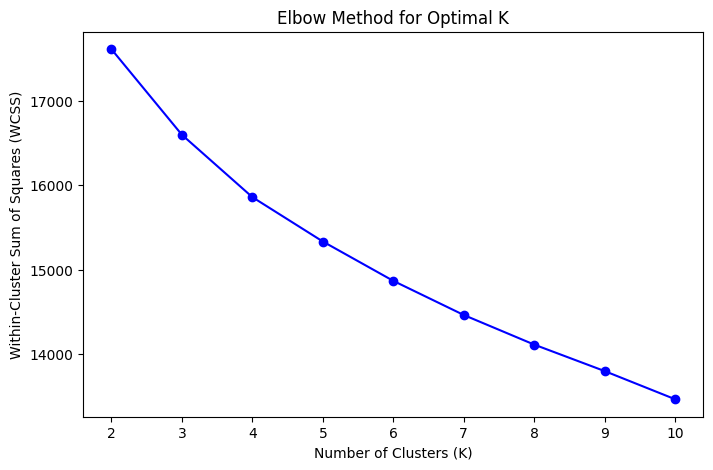

In [32]:
# Plot Elbow Method (WCSS vs. K)
plt.figure(figsize=(8, 5))
plt.plot(k_values, wcss, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal K')
plt.show()

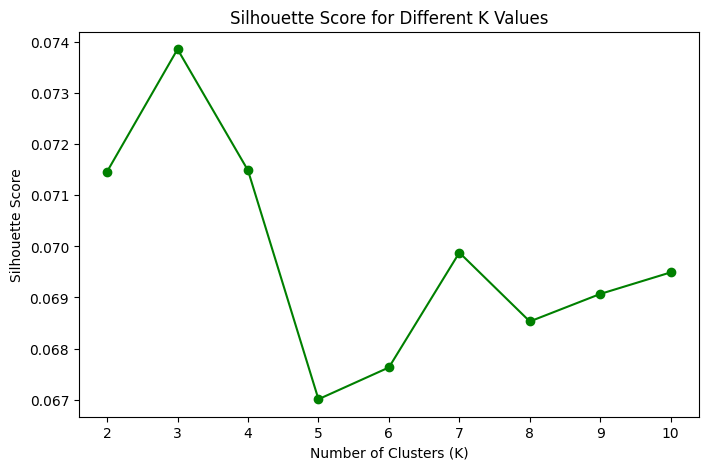

In [33]:
# Plot Silhouette Score vs. K
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='-', color='g')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different K Values')
plt.show()

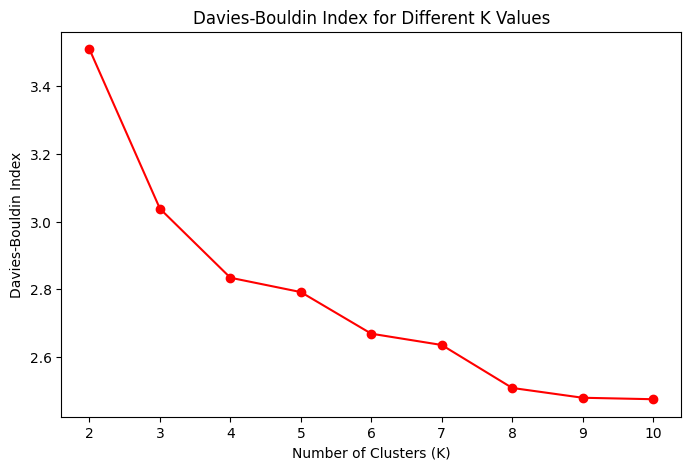

In [34]:
# Plot Davies-Bouldin Index vs. K
plt.figure(figsize=(8, 5))
plt.plot(k_values, davies_bouldin_scores, marker='o', linestyle='-', color='r')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Davies-Bouldin Index')
plt.title('Davies-Bouldin Index for Different K Values')
plt.show()

In [35]:
# Display the best K based on each metric
optimal_k_elbow = k_values[np.argmin(wcss)]  # Where WCSS has the largest drop
optimal_k_silhouette = k_values[np.argmax(silhouette_scores)]  # Highest Silhouette Score
optimal_k_davies_bouldin = k_values[np.argmin(davies_bouldin_scores)]  # Lowest Davies-Bouldin Index

print(f"Optimal K (Elbow Method): {optimal_k_elbow}")
print(f"Optimal K (Silhouette Score): {optimal_k_silhouette}")
print(f"Optimal K (Davies-Bouldin Index): {optimal_k_davies_bouldin}")

Optimal K (Elbow Method): 10
Optimal K (Silhouette Score): 3
Optimal K (Davies-Bouldin Index): 10


##### ✅ Step 6.2.3: Apply K-Means Clustering

In [36]:
"""
🔹 What will we do?
    • Use the optimal K from Step 2 to apply K-Means Clustering.
    • Assign each data point to a cluster.
🔹 Why?
    • K-Means will group respondents based on their shutdown perceptions, mental health impact, and civic engagement.
    • This will help identify meaningful public sentiment groups.
🔹 How will we do it?
    ✅ Run K-Means with the optimal K
    ✅ Obtain cluster assignments for each data point
"""

'\n🔹 What will we do?\n    • Use the optimal K from Step 2 to apply K-Means Clustering.\n    • Assign each data point to a cluster.\n🔹 Why?\n    • K-Means will group respondents based on their shutdown perceptions, mental health impact, and civic engagement.\n    • This will help identify meaningful public sentiment groups.\n🔹 How will we do it?\n    ✅ Run K-Means with the optimal K\n    ✅ Obtain cluster assignments for each data point\n'

In [37]:
# Load preprocessed data from Step 1
print(df_scaled.head())

   Shutdown_Effectiveness_in_GIP  Justify_Shutdown_in_Certain_Situation  Future_Acceptance_of_S_for_NS  Mental_Impact_of_S  Lasting_Impact_on_MH  Coping_Strategy_DS  Protest_Hindrance_AG  Future_Civic_Engagement_if_ASO  Democracy_Perception_if_SDOA  CORS_on_National_Stability  Change_Digital_Dependency  News_Reliance_on_Internet_BS  Comm_Disruption_due_to_S  S_Limit_Freedom_of_Speech  Internet_Usage_BS
0                      -0.615408                               0.243364                      -0.005726           -1.425024              0.411903            0.961073              1.760341                       -0.129522                      1.948712                    1.265247                   0.976904                     -2.106259                 -2.384567                   1.901554          -1.394069
1                       0.196802                              -1.164590                       0.653790           -1.425024              0.411903            0.012724             -0.246273  

In [38]:
# Use the optimal K from Step 2
optimal_k = 5

In [39]:
# Run K-Means with the optimal K
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10, max_iter=300)
df_scaled['Cluster'] = kmeans.fit_predict(df_scaled)

In [40]:
# Save clustered data into a new DataFrame
df_clustered = df_scaled.copy()
print(df_clustered.head())

   Shutdown_Effectiveness_in_GIP  Justify_Shutdown_in_Certain_Situation  Future_Acceptance_of_S_for_NS  Mental_Impact_of_S  Lasting_Impact_on_MH  Coping_Strategy_DS  Protest_Hindrance_AG  Future_Civic_Engagement_if_ASO  Democracy_Perception_if_SDOA  CORS_on_National_Stability  Change_Digital_Dependency  News_Reliance_on_Internet_BS  Comm_Disruption_due_to_S  S_Limit_Freedom_of_Speech  Internet_Usage_BS  Cluster
0                      -0.615408                               0.243364                      -0.005726           -1.425024              0.411903            0.961073              1.760341                       -0.129522                      1.948712                    1.265247                   0.976904                     -2.106259                 -2.384567                   1.901554          -1.394069        0
1                       0.196802                              -1.164590                       0.653790           -1.425024              0.411903            0.012724      

In [41]:
# Assign each data point to a cluster
cluster_assignments = df_scaled['Cluster'].value_counts().sort_index()

In [42]:
# Display the number of points in each cluster
print("Cluster Assignments:")
print(cluster_assignments)

Cluster Assignments:
Cluster
0    234
1    232
2    260
3    311
4    230
Name: count, dtype: int64


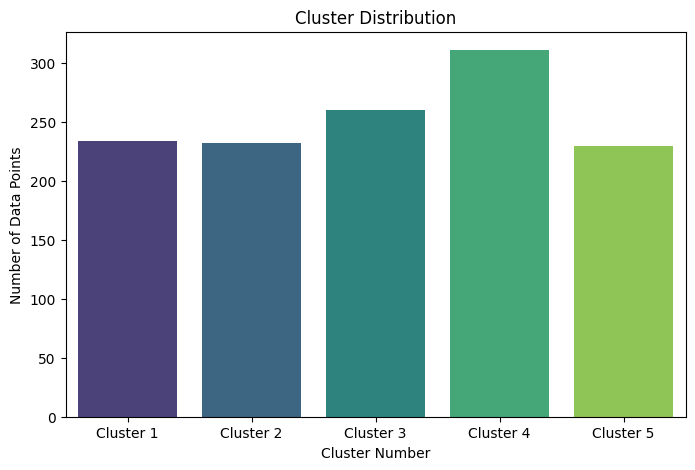

In [43]:
# Visualizing the cluster sizes
plt.figure(figsize=(8, 5))
cluster_labels = ['Cluster ' + str(i+1) for i in cluster_assignments.index]
sns.barplot(x=cluster_labels, y=cluster_assignments.values, palette='viridis')
plt.xlabel("Cluster Number")
plt.ylabel("Number of Data Points")
plt.title("Cluster Distribution")
plt.show()

##### ✅ Step 6.2.4: Visualize Clusters

In [44]:
"""
🔹 What will we do?
    • Reduce high-dimensional data (12 features) into 2D or 3D for visualization.
    • Use Principal Component Analysis (PCA) and t-SNE to plot clusters.
🔹 Why?
    • K-Means operates in high-dimensional space, making it difficult to interpret results.
    • PCA reduces dimensionality while preserving variance, allowing us to see clusters clearly.
🔹 How will we do it?
    ✅ Apply PCA to reduce 12D data to 2D or 3D
    ✅ Plot clusters using scatter plots with color-coded cluster labels
    ✅ Use t-SNE if PCA does not show clear separation
"""

'\n🔹 What will we do?\n    • Reduce high-dimensional data (12 features) into 2D or 3D for visualization.\n    • Use Principal Component Analysis (PCA) and t-SNE to plot clusters.\n🔹 Why?\n    • K-Means operates in high-dimensional space, making it difficult to interpret results.\n    • PCA reduces dimensionality while preserving variance, allowing us to see clusters clearly.\n🔹 How will we do it?\n    ✅ Apply PCA to reduce 12D data to 2D or 3D\n    ✅ Plot clusters using scatter plots with color-coded cluster labels\n    ✅ Use t-SNE if PCA does not show clear separation\n'

In [45]:
# Load preprocessed data
df_pca = df_scaled.copy()
df_pca.shape

(1267, 16)

In [46]:
# Apply PCA to reduce 12D data to 2D
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_pca)
df_pca['PCA1'] = pca_result[:, 0]
df_pca['PCA2'] = pca_result[:, 1]
df_pca.shape

(1267, 18)

In [47]:
# Run K-Means on PCA-reduced data
optimal_k = 5  # Replace with the actual optimal K found in Step 2
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10, max_iter=300)
df_pca['Cluster'] = kmeans.fit_predict(df_pca[['PCA1', 'PCA2']])
df_pca['Cluster'] = df_pca['Cluster'] + 1
df_pca.shape

(1267, 18)

In [63]:
centroids = kmeans.cluster_centers_

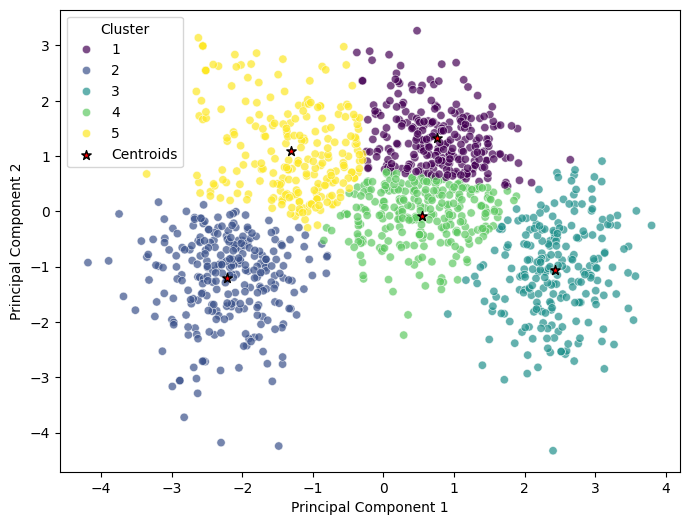

In [73]:
# Plot clusters in 2D using PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca['PCA1'], y=df_pca['PCA2'], hue=df_pca['Cluster'], palette='viridis', alpha=0.7)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=50, c='red', label='Centroids', edgecolor='black')  # ⭐ Centroids
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
# plt.title("K-Means Clusters (PCA 2D Projection)")
plt.legend(title="Cluster")
plt.show()

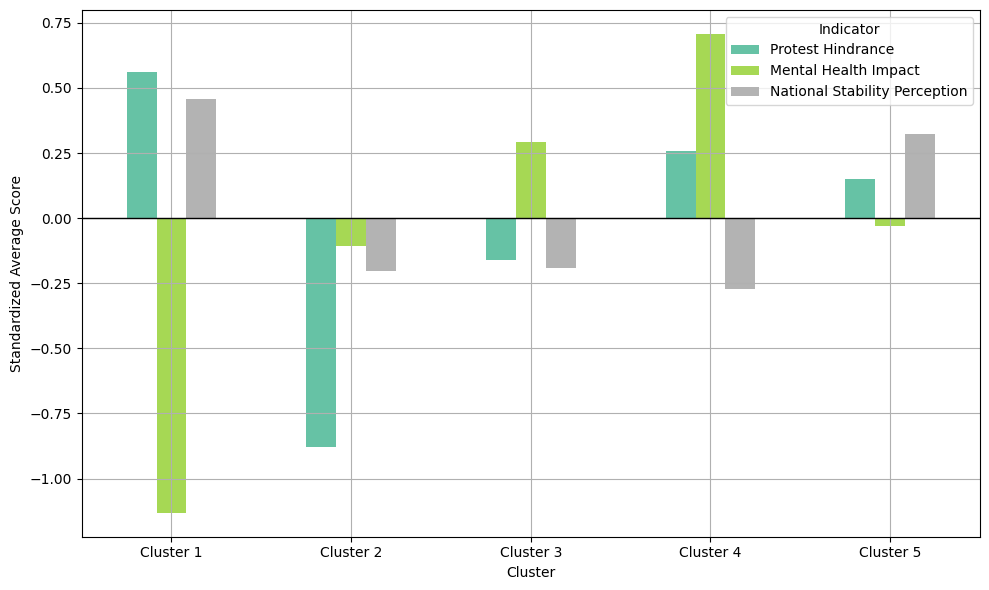

In [72]:
import pandas as pd
import matplotlib.pyplot as plt

# Create dataframes for each variable
protest_data = {
    'Cluster': ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5'],
    'Protest Hindrance': [0.559802, -0.877665, -0.161378, 0.256993, 0.150687]
}
mental_data = {
    'Cluster': ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5'],
    'Mental Health Impact': [-1.131370, -0.107133, 0.294066, 0.707437, -0.029891]
}
stability_data = {
    'Cluster': ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5'],
    'National Stability Perception': [0.459064, -0.201363, -0.192509, -0.271981, 0.321451]
}

# Merge into a single dataframe for easier plotting
df = pd.DataFrame(protest_data).merge(pd.DataFrame(mental_data), on='Cluster').merge(pd.DataFrame(stability_data), on='Cluster')
df = df.set_index('Cluster')

# Plot grouped bar chart
ax = df.plot(kind='bar', figsize=(10, 6), colormap='Set2')
plt.axhline(0, color='black', linewidth=1)
plt.title('')
plt.ylabel('Standardized Average Score')
plt.xticks(rotation=0)
plt.legend(title='Indicator')
plt.tight_layout()
plt.grid()
plt.show()


In [49]:
# Apply PCA to reduce 12D data to 3D
pca_3d = PCA(n_components=3)
pca_result_3d = pca_3d.fit_transform(df_pca.drop(columns=['Cluster']))
df_pca['PCA1_3D'] = pca_result_3d[:, 0]
df_pca['PCA2_3D'] = pca_result_3d[:, 1]
df_pca['PCA3_3D'] = pca_result_3d[:, 2]
df_pca.shape

(1267, 21)

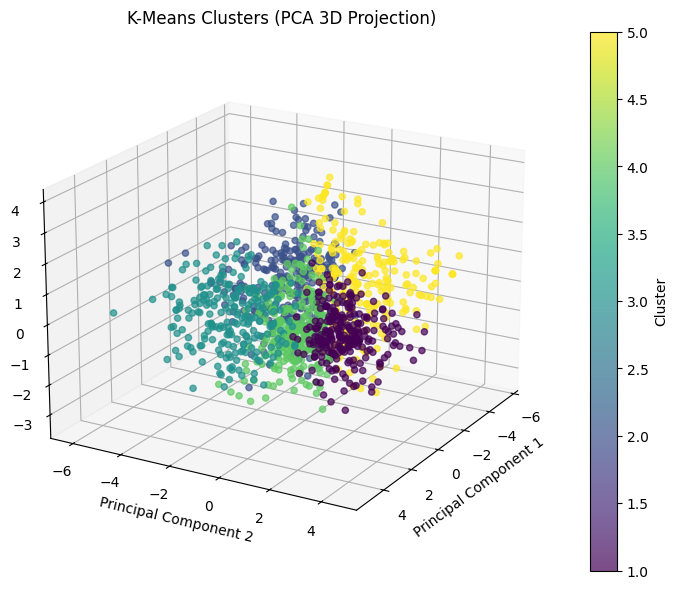

In [50]:
# 3D Scatter Plot using PCA with interactive rotation
dpi = 100
fig = plt.figure(figsize=(10, 7), dpi=dpi)
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(df_pca['PCA1_3D'], df_pca['PCA2_3D'], df_pca['PCA3_3D'], c=df_pca['Cluster'], cmap='viridis', alpha=0.7)
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
plt.title("K-Means Clusters (PCA 3D Projection)")
plt.colorbar(sc, label="Cluster")
ax.view_init(elev=20, azim=30)  # Allows rotation with mouse in interactive mode
plt.show()

##### ✅ Step 6.2.5: Analyze Cluster Characteristics

In [51]:
"""
🔹 What will we do?
    • Compare cluster differences in key features.
    • Identify patterns in shutdown perception, mental health impact, and government stability.
🔹 Why?
    • Helps interpret each group's stance (e.g., pro-shutdown, anti-shutdown, neutral).
    • Ensures clusters align with real-world behaviors.
🔹 How will we do it?
    ✅ Compute cluster-wise averages for all 15 features
    ✅ Use box plots and heatmaps to compare cluster distributions
    ✅ Analyze trends in government stability perception, protest willingness, and mental health impact
"""

"\n🔹 What will we do?\n    • Compare cluster differences in key features.\n    • Identify patterns in shutdown perception, mental health impact, and government stability.\n🔹 Why?\n    • Helps interpret each group's stance (e.g., pro-shutdown, anti-shutdown, neutral).\n    • Ensures clusters align with real-world behaviors.\n🔹 How will we do it?\n    ✅ Compute cluster-wise averages for all 15 features\n    ✅ Use box plots and heatmaps to compare cluster distributions\n    ✅ Analyze trends in government stability perception, protest willingness, and mental health impact\n"

In [52]:
# Load clustered data
df_analysis = df_clustered.copy()
print(df_analysis.head())

   Shutdown_Effectiveness_in_GIP  Justify_Shutdown_in_Certain_Situation  Future_Acceptance_of_S_for_NS  Mental_Impact_of_S  Lasting_Impact_on_MH  Coping_Strategy_DS  Protest_Hindrance_AG  Future_Civic_Engagement_if_ASO  Democracy_Perception_if_SDOA  CORS_on_National_Stability  Change_Digital_Dependency  News_Reliance_on_Internet_BS  Comm_Disruption_due_to_S  S_Limit_Freedom_of_Speech  Internet_Usage_BS  Cluster
0                      -0.615408                               0.243364                      -0.005726           -1.425024              0.411903            0.961073              1.760341                       -0.129522                      1.948712                    1.265247                   0.976904                     -2.106259                 -2.384567                   1.901554          -1.394069        0
1                       0.196802                              -1.164590                       0.653790           -1.425024              0.411903            0.012724      

In [53]:
# Compute cluster-wise averages for all 12 features
cluster_means = df_analysis.groupby('Cluster').mean()
print("Cluster-Wise Feature Averages:")
print(cluster_means.T)

Cluster-Wise Feature Averages:
Cluster                                       0         1         2         3         4
Shutdown_Effectiveness_in_GIP         -0.316903  0.273822 -0.365497 -0.160988  0.677066
Justify_Shutdown_in_Certain_Situation -0.099599 -0.645710 -0.046350 -0.218409  1.100379
Future_Acceptance_of_S_for_NS          0.019640  0.255806  0.265690  0.223302 -0.880301
Mental_Impact_of_S                    -1.131370 -0.107133  0.294066  0.707437 -0.029891
Lasting_Impact_on_MH                  -0.043491  0.176355 -0.344751 -0.203098  0.530702
Coping_Strategy_DS                     0.353157 -0.175310  0.308172 -0.228174 -0.222301
Protest_Hindrance_AG                   0.559802 -0.877665 -0.161378  0.256993  0.150687
Future_Civic_Engagement_if_ASO        -0.197609 -0.009342  0.857065 -0.208928 -0.475880
Democracy_Perception_if_SDOA           0.603505  0.713112 -0.505706 -0.233813 -0.445491
CORS_on_National_Stability             0.459064 -0.201363 -0.192509 -0.271981  0.321451
C

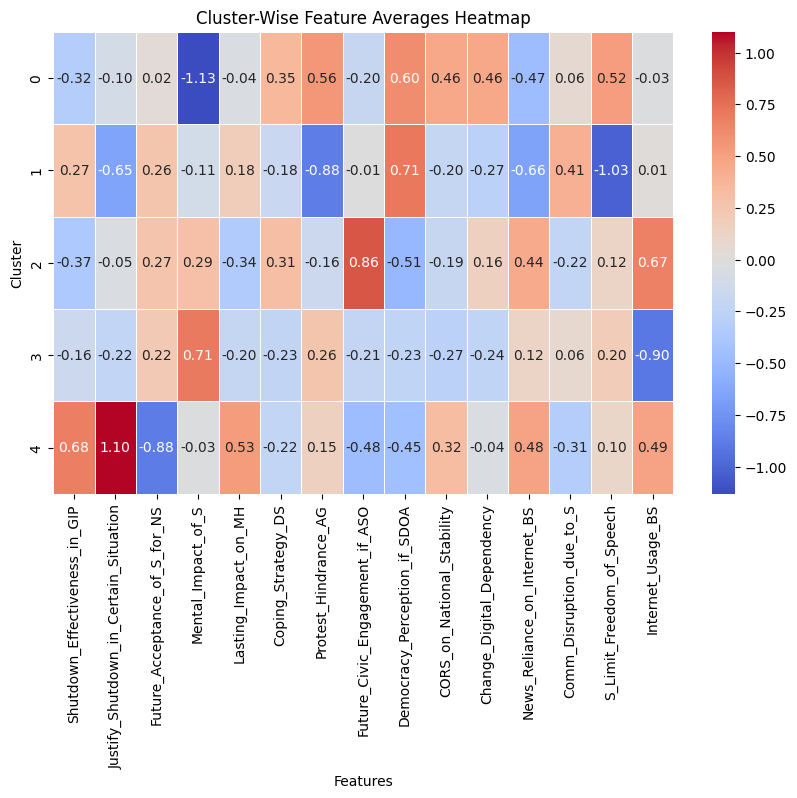

In [54]:
# Plot heatmap of cluster means
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_means, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Cluster-Wise Feature Averages Heatmap")
plt.xlabel("Features")
plt.ylabel("Cluster")
plt.show()

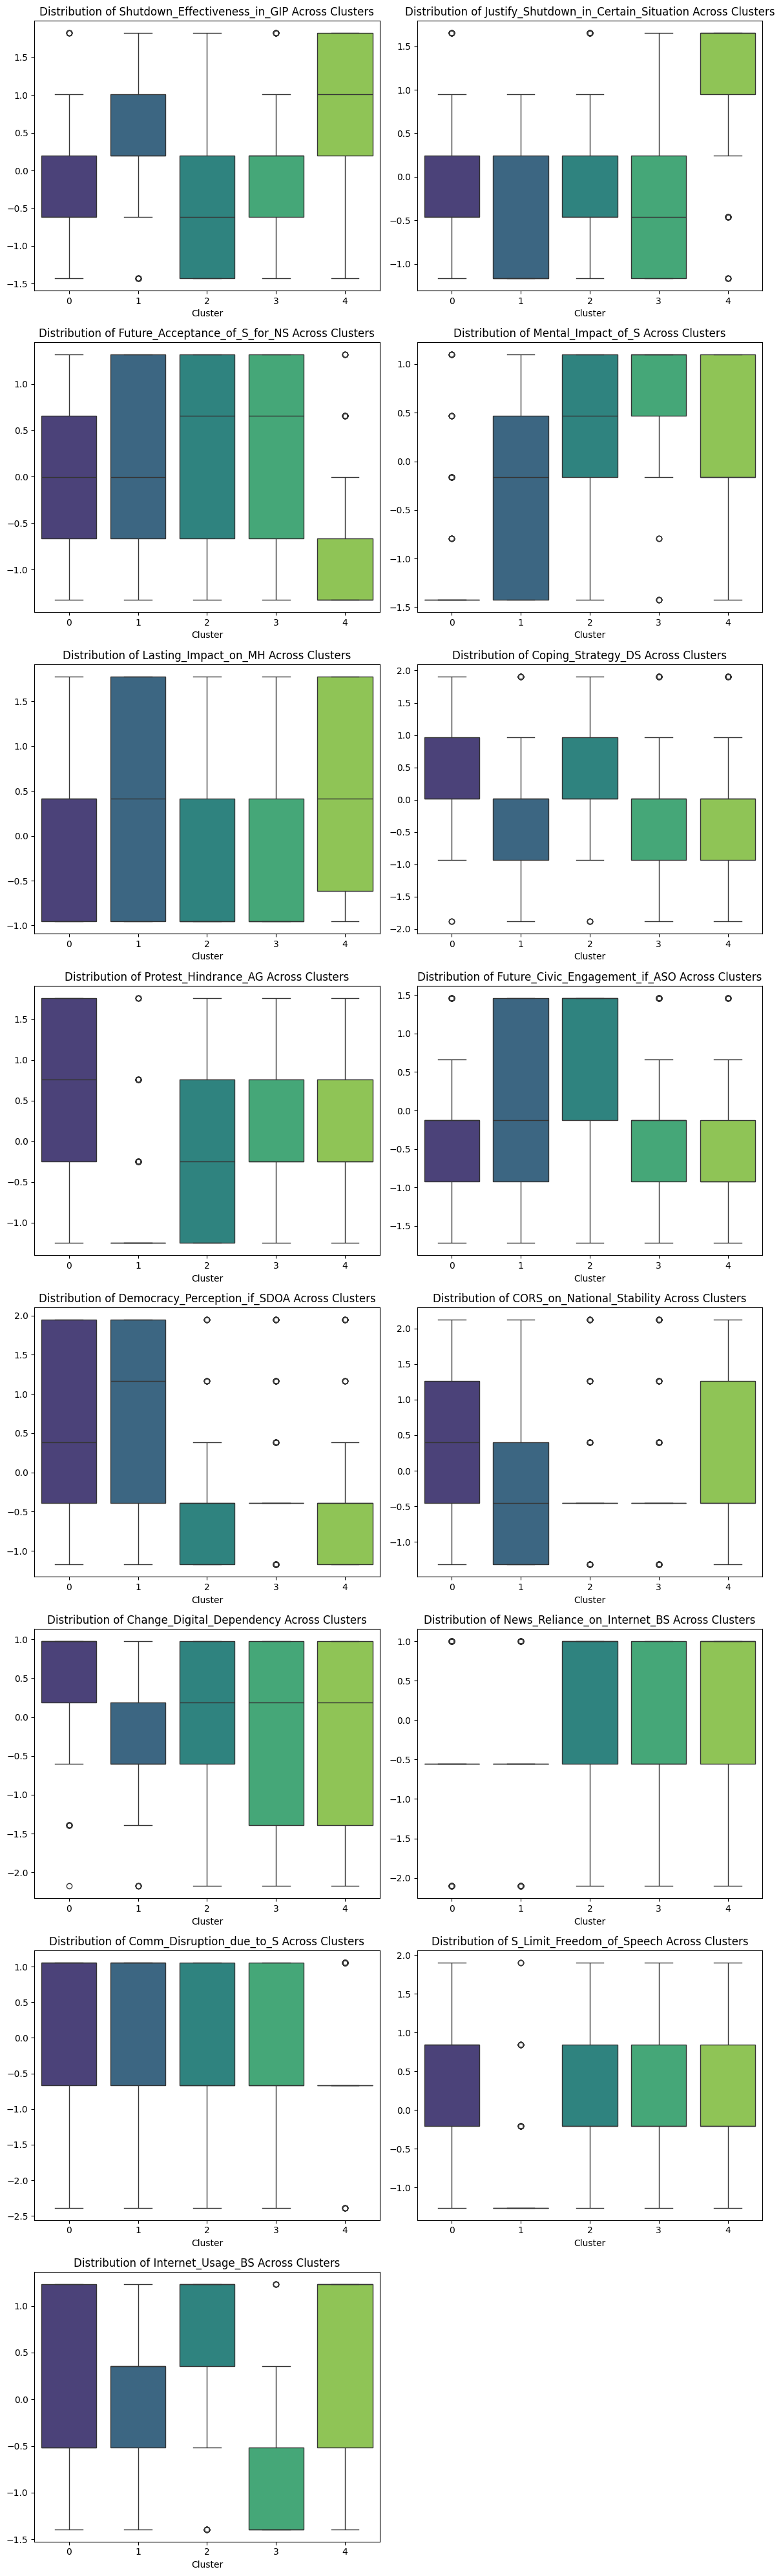

In [55]:
# Boxplots to compare distributions across clusters for key features
# Plot all boxplots in a single figure with subplots (2 per row)
num_features = len(selected_features)
num_cols = 2  # Number of columns in subplot
num_rows = (num_features // num_cols) + (num_features % num_cols > 0)  # Calculate rows needed

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 5 * num_rows))
axes = axes.flatten()

for i, feature in enumerate(selected_features):
    sns.boxplot(x=df_analysis['Cluster'], y=df_analysis[feature], palette='viridis', ax=axes[i])
    axes[i].set_xlabel("Cluster")
    axes[i].set_ylabel("")  # Remove y-label
    axes[i].set_title(f"Distribution of {feature} Across Clusters")

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Trend in Protest hindrance

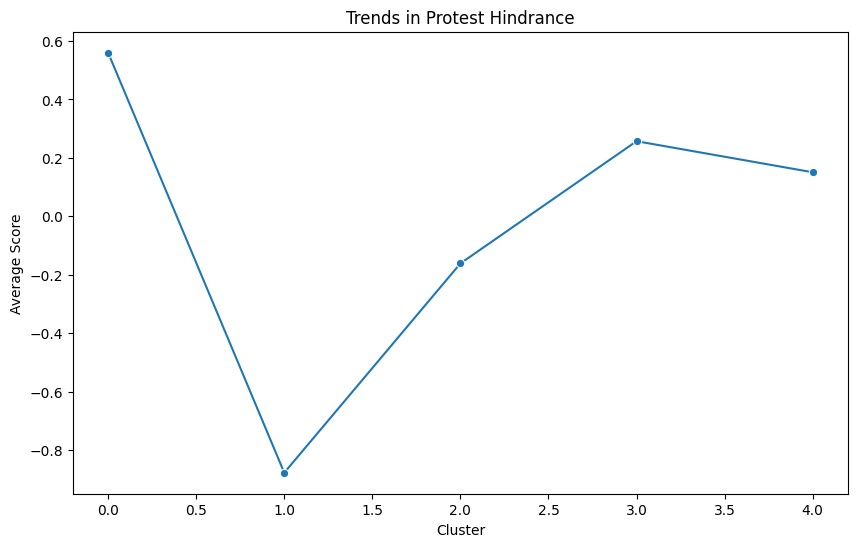

Cluster
0    0.559802
1   -0.877665
2   -0.161378
3    0.256993
4    0.150687
Name: Protest_Hindrance_AG, dtype: float64


In [56]:
# Analyze trends in government stability perception, protest willingness, and mental health impact
trends_features = ["Protest_Hindrance_AG"]
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_analysis, x="Cluster", y=df_analysis[trends_features].mean(axis=1), marker='o', ci=None, palette='dark')
plt.xlabel("Cluster")
plt.ylabel("Average Score")
plt.title("Trends in Protest Hindrance")
plt.show()

# Calculate mean Protest_Hindrance_AG per cluster
protest_means = df_analysis.groupby("Cluster")["Protest_Hindrance_AG"].mean()
print(protest_means)


Trend in mental health impact

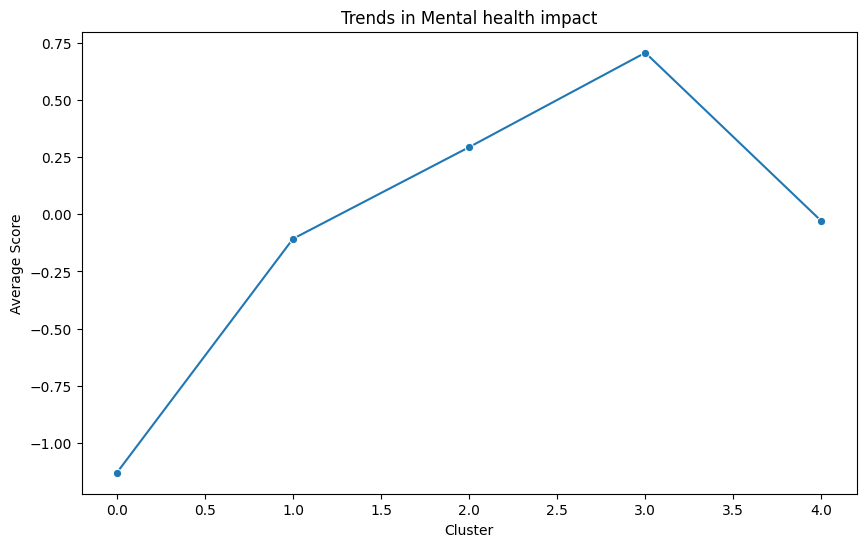

Cluster
0   -1.131370
1   -0.107133
2    0.294066
3    0.707437
4   -0.029891
Name: Mental_Impact_of_S, dtype: float64


In [57]:
# Analyze trends in mental health impact
trends_features = ["Mental_Impact_of_S"]
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_analysis, x="Cluster", y=df_analysis[trends_features].mean(axis=1), marker='o', ci=None, palette='dark')
plt.xlabel("Cluster")
plt.ylabel("Average Score")
plt.title("Trends in Mental health impact")
plt.show()

# Calculate mean mental health impact_AG per cluster
protest_means = df_analysis.groupby("Cluster")["Mental_Impact_of_S"].mean()
print(protest_means)


Trend in CORS_on_National_Stability

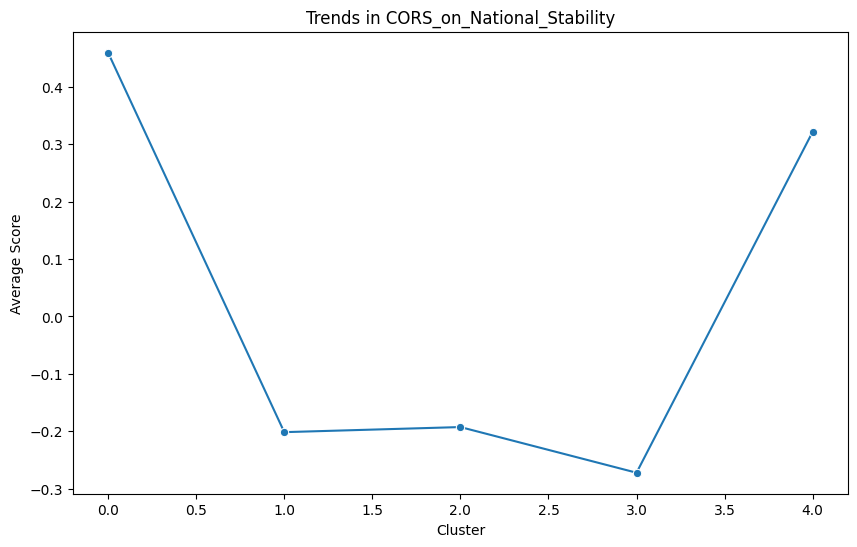

Cluster
0    0.459064
1   -0.201363
2   -0.192509
3   -0.271981
4    0.321451
Name: CORS_on_National_Stability, dtype: float64


In [58]:
# Analyze trends in government stability perception, protest willingness, and mental health impact
trends_features = ["CORS_on_National_Stability"]
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_analysis, x="Cluster", y=df_analysis[trends_features].mean(axis=1), marker='o', ci=None, palette='dark')
plt.xlabel("Cluster")
plt.ylabel("Average Score")
plt.title("Trends in CORS_on_National_Stability")
plt.show()

# Calculate mean Protest_Hindrance_AG per cluster
protest_means = df_analysis.groupby("Cluster")["CORS_on_National_Stability"].mean()
print(protest_means)


3 ta ek7a

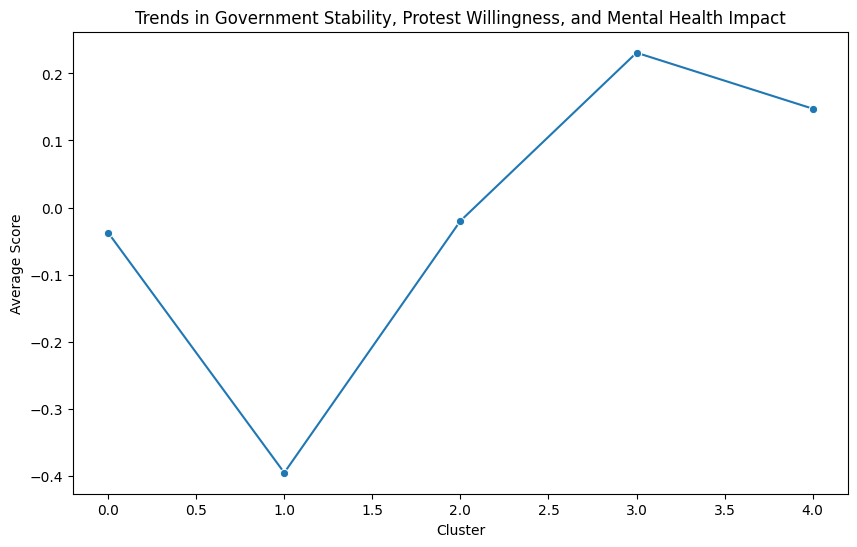

Cluster
0   -0.037501
1   -0.395387
2   -0.019940
3    0.230817
4    0.147416
Name: Average_Score, dtype: float64


In [59]:
# Analyze trends in government stability perception, protest willingness, and mental health impact
trends_features = ["CORS_on_National_Stability", "Protest_Hindrance_AG", "Mental_Impact_of_S"]
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_analysis, x="Cluster", y=df_analysis[trends_features].mean(axis=1), marker='o', ci=None, palette='dark')
plt.xlabel("Cluster")
plt.ylabel("Average Score")
plt.title("Trends in Government Stability, Protest Willingness, and Mental Health Impact")
plt.show()



# First, group by 'Cluster' and calculate the mean for the selected features
cluster_means = df_analysis.groupby("Cluster")[trends_features].mean()

# Then calculate the average across these selected features for each cluster
cluster_means["Average_Score"] = cluster_means.mean(axis=1)

# Now print or inspect the values
print(cluster_means["Average_Score"])
